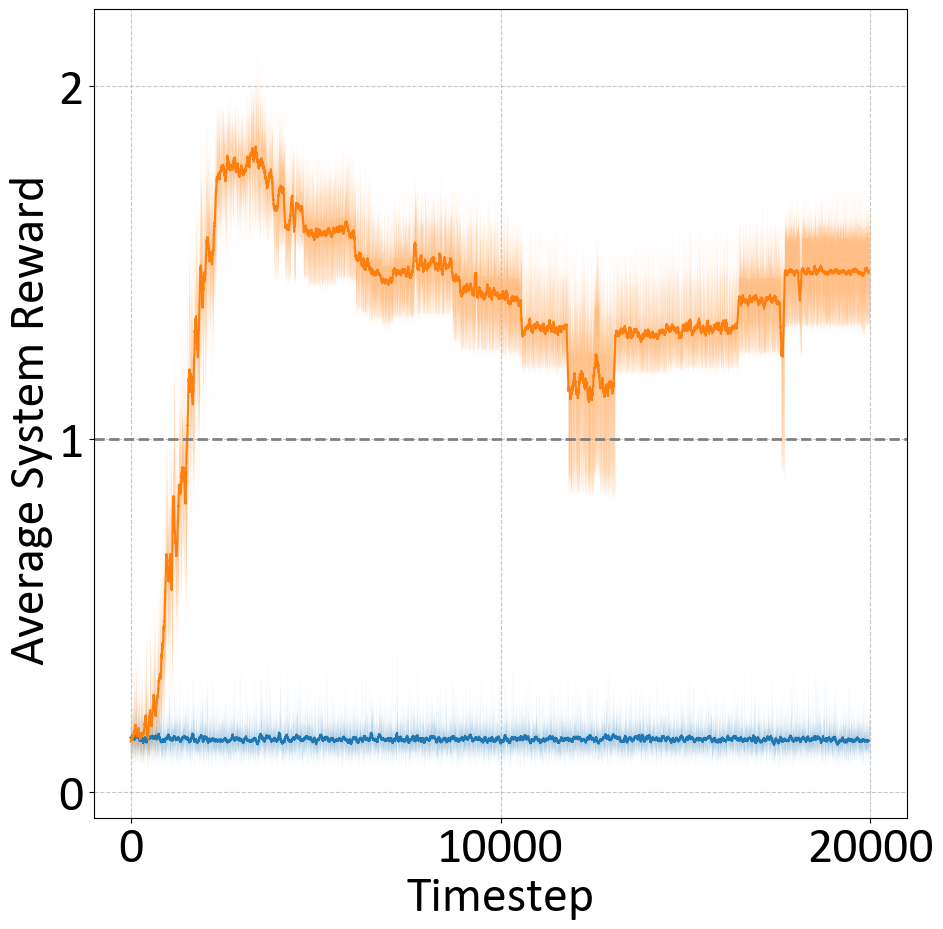

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Set default font for the entire plot
plt.rc('font', family='calibri', size=12)
# set parameters
n= 30
t= 15
n1 = n
n2 = n
t1 = t
t2 = t
z_level= 1

def moving_average(arr, window_size):
    moving_averages = []
    for i in range(len(arr) - window_size + 1):
        window = arr[i:i + window_size]
        average = sum(window) / window_size
        moving_averages.append(average)
    return moving_averages

    s_dev = np.std(steps_to_complete, axis=0)


# load simulation results
cum_rew_1 = np.load(f'data/base_comm/n{n1}t{t1}_cum_rew.npy')
mean1 = np.mean(cum_rew_1, axis=0) # average over sims
s_dev1 = np.std(cum_rew_1, axis=0)
lower_bound1 = mean1 - z_level * (s_dev1 / np.sqrt(cum_rew_1.shape[0]))
upper_bound1 = mean1 + z_level  * (s_dev1 / np.sqrt(cum_rew_1.shape[0]))

cum_rew_2 = np.load(f'data/simple_greedy/k/n{n2}t{t2}_cum_rew.npy')
mean2 = np.mean(cum_rew_2, axis=0) # average over sims
s_dev2 = np.std(cum_rew_2, axis=0)
lower_bound2 = mean2 - z_level  * (s_dev2 / np.sqrt(cum_rew_2.shape[0]))
upper_bound2 = mean2 + z_level  * (s_dev2 / np.sqrt(cum_rew_2.shape[0]))

fs = 36

# plot cum rew graphs
plt.xlabel('Timestep', fontsize=fs)
plt.ylabel('Average System Reward ', fontsize=fs)

plt.xticks(np.arange(0, 20000+1, 10000))  # ticks at -1, -0.5, 0, 0.5, 1
plt.yticks(np.linspace(0.0, 4.0, 5))  # ticks at -1, -0.5, 0, 0.5, 1

plt.xticks(fontsize=fs)  # Adjust the fontsize as needed
plt.yticks(fontsize=fs)  # Adjust the fontsize as needed

plt.plot(moving_average(mean1,50))#, label='base')
plt.plot(moving_average(mean2,50))#, label='simple-greedy')
plt.fill_between(range(len(mean1)), lower_bound1, upper_bound1, alpha=0.5)
plt.fill_between(range(len(mean2)), lower_bound2, upper_bound2, alpha=0.5)



fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.axhline(y=1, color='grey', linestyle='--', linewidth=2)#,label='LoMC')
#legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=fs, ncol=2,frameon =False )
plt.grid(True, linestyle='--', alpha=0.7)
